In [0]:
from os.path import join
from google.colab import drive
# Montar el DRIVE
ROOT = "/content/drive"
drive.mount(ROOT)# Apuntar a la carpeta de trabajo
PROJ = "My Drive/MSI-MSS_project" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.fftpack import fft
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap
from skimage.exposure import rescale_intensity
from PIL import Image
from google.colab.patches import cv2_imshow

In [0]:
set_completo = pd.read_pickle(join(PROJECT_PATH,'final_subset_Color.pkl'))

In [0]:
set_completo["label"] = np.where((set_completo["label"]=="MSI"),0,1)

In [0]:
set_completo["label"].value_counts()

1    2000
0    2000
Name: label, dtype: int64

In [0]:
def sizeImage(series_value, size=(100,100)):
    return cv2.resize(series_value, size, interpolation=cv2.INTER_NEAREST) 

In [0]:
set_completo["image_resiz"] = set_completo["image_array"].apply(sizeImage)
#set_completo["resize"] = set_completo["image_array_Float"]

In [0]:
def fftransform(array):
    '''fft to all the array images (column in this case)'''
    return np.abs(fft(array,5, axis=-1))

In [0]:
set_completo["fft"] = set_completo["image_resiz"].apply(fftransform)


In [0]:
"""
def quitar(value):
  return value[:,:,0]"""

'\ndef quitar(value):\n  return value[:,:,0]'

In [0]:
#set_completo["fftsinuno"] = set_completo["fft"].apply(quitar)

In [0]:
#def norm(value):
  #return value/np.amax(value)

In [0]:

#= set_completo["fftsinuno"].apply(norm)

In [0]:
X=np.asarray(list(set_completo['fft']))
X = X.reshape(X.shape[0], -1)
y=np.asarray(set_completo['label'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
X_train.shape

(3200, 50000)

In [0]:
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [0]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred=model.predict(X_test)

In [0]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred, average='weighted'))
print("F1Score",f1_score(y_test, y_pred),"\n")

Accuracy 0.51375
Precision 0.5163636363636364
Precision 0.5143623376623377
Recall 0.35678391959798994
Recall 0.51375
F1Score 0.42199108469539376 



,gt,predicted,proba MSI,proba MSS
0,0,1,0.469813,0.530187
1,0,0,0.550707,0.449293
2,1,0,0.519221,0.480779
3,1,0,0.500730,0.499270
4,1,0,0.522838,0.477162


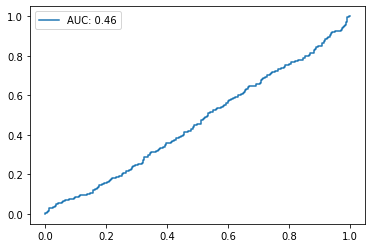

In [0]:
y_score = model.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,0])
display(pd.DataFrame({
    "gt":y_test,
    "predicted":y_pred,
    "proba MSI":y_score[:,0],
    "proba MSS":y_score[:,1]
}).head())

plt.plot(roc[0],roc[1])
plt.legend(["AUC: {}".format(round(roc_auc_score(y_test, y_score[:,0]),2))])

In [0]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,269,133
1,256,142
